# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

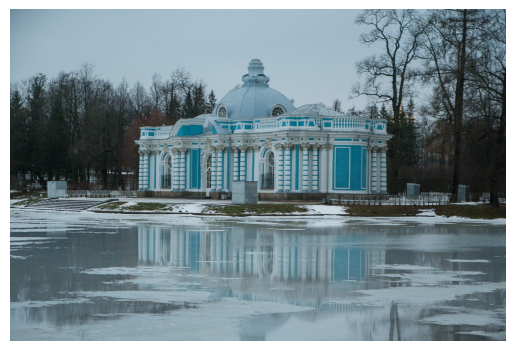

In [19]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


# Путь к изображению
img_path = '/Users/muzafarov/Desktop/MyEducation/ML_OE/spb_barocco.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [20]:
myimg = cv2.imread(img_path)
avg_color_per_row = np.average(myimg, axis=0)
avg_color = np.average(avg_color_per_row, axis=0)
print(avg_color.mean())

121.34155988366433


In [21]:
np.mean(img)

121.34155988366433

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [22]:
img = img/255
img

array([[[0.44313725, 0.54509804, 0.61176471],
        [0.44705882, 0.54901961, 0.61568627],
        [0.44313725, 0.54901961, 0.61568627],
        ...,
        [0.35294118, 0.44313725, 0.50588235],
        [0.3372549 , 0.42745098, 0.49019608],
        [0.21176471, 0.30196078, 0.36470588]],

       [[0.43137255, 0.53333333, 0.6       ],
        [0.43921569, 0.54117647, 0.60784314],
        [0.43921569, 0.54509804, 0.61176471],
        ...,
        [0.43921569, 0.52941176, 0.59215686],
        [0.4745098 , 0.56470588, 0.62745098],
        [0.38039216, 0.47058824, 0.53333333]],

       [[0.42352941, 0.5254902 , 0.59215686],
        [0.42745098, 0.53333333, 0.6       ],
        [0.43529412, 0.54117647, 0.60784314],
        ...,
        [0.31764706, 0.40784314, 0.4627451 ],
        [0.51764706, 0.60784314, 0.6627451 ],
        [0.38431373, 0.4745098 , 0.52941176]],

       ...,

       [[0.47058824, 0.56078431, 0.61568627],
        [0.47058824, 0.56078431, 0.61568627],
        [0.47058824, 0

In [23]:
np.mean(img)

0.47584925444574244

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [24]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [25]:
img.shape[0]

856

In [26]:
img_reshape = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [27]:
img_reshape

array([[0.44313725, 0.54509804, 0.61176471],
       [0.44705882, 0.54901961, 0.61568627],
       [0.44313725, 0.54901961, 0.61568627],
       ...,
       [0.29019608, 0.35686275, 0.39607843],
       [0.31372549, 0.38039216, 0.41960784],
       [0.34509804, 0.41176471, 0.45098039]])

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [28]:
from sklearn.cluster import MiniBatchKMeans
model_norm = MiniBatchKMeans(n_clusters=16, random_state=12)

In [29]:
model_norm.fit(img_reshape)

/Users/muzafarov/anaconda3/envs/ML_OE/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=16, random_state=12)

In [30]:
clusters = model_norm.cluster_centers_

In [31]:
cls = model_norm.predict(img_reshape)

In [32]:
new_img = np.array(img_reshape)

0.4752663363793198

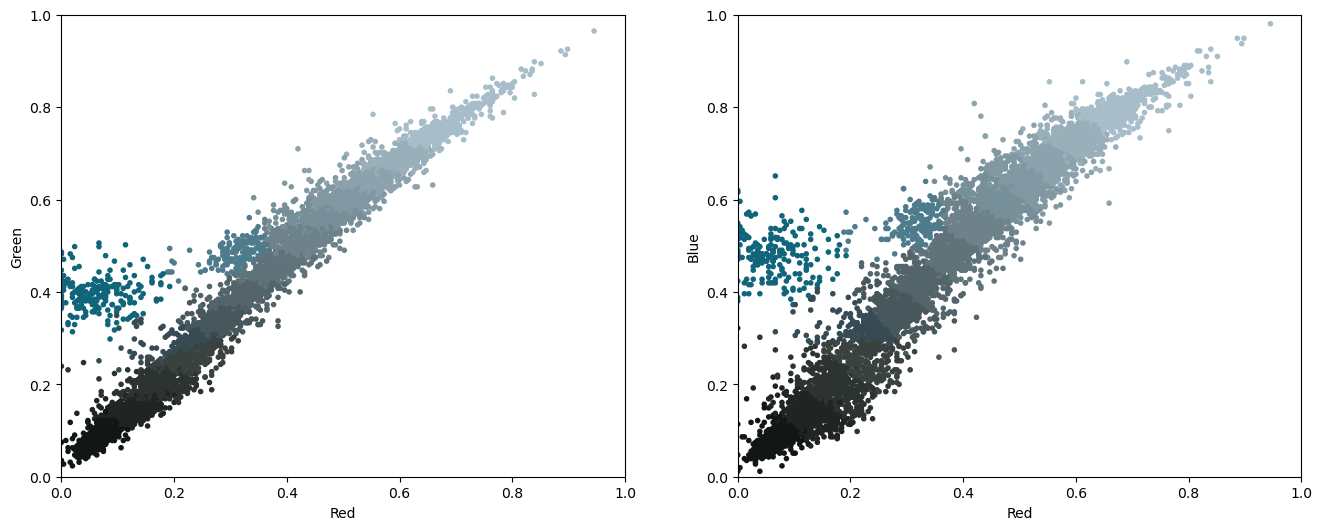

In [33]:
for i in range(len(img_reshape)):
  new_img[i] = clusters[cls[i]]

plot_pixels(img_reshape, colors=new_img)

new_img.mean()

In [47]:
clusters

array([[0.50667485, 0.59757785, 0.638066  ],
       [0.12435253, 0.14302989, 0.13263265],
       [0.2128591 , 0.29330825, 0.3244528 ],
       [0.65683225, 0.74410308, 0.79281159],
       [0.3776109 , 0.45030362, 0.47736059],
       [0.59833346, 0.68718691, 0.73070494],
       [0.28065982, 0.34092748, 0.36050213],
       [0.06262938, 0.39562842, 0.48101575],
       [0.42825931, 0.51105106, 0.54436361],
       [0.17127025, 0.19882779, 0.1956948 ],
       [0.32412965, 0.39140856, 0.4160064 ],
       [0.07097618, 0.09072739, 0.08368543],
       [0.2276484 , 0.25719926, 0.25282003],
       [0.30537269, 0.48521271, 0.54795781],
       [0.55005748, 0.639551  , 0.68060612],
       [0.46444488, 0.55945987, 0.59889558]])

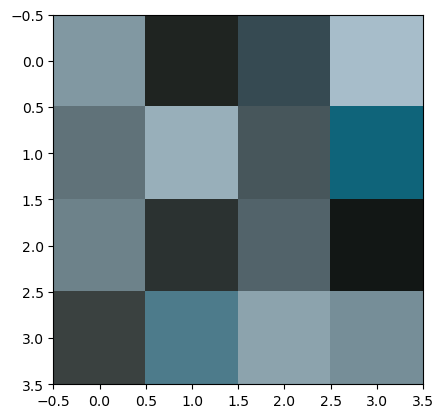

In [48]:
plt.imshow(clusters.reshape(4, 4, 3))

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [35]:
# < ENTER YOUR CODE HERE > 

Выберите номер изображения, соответствующего палитре из $16$ цветов.

In [36]:
# < ENTER YOUR CODE HERE > 

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

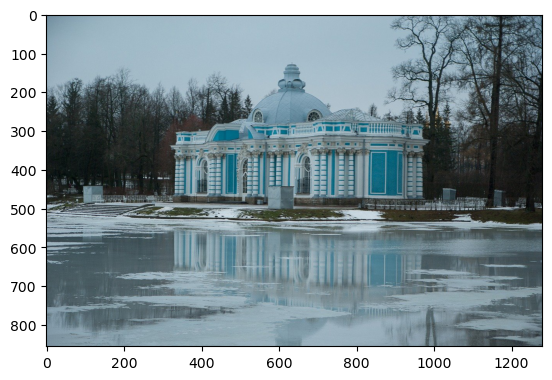

In [53]:
plt.imshow(img)

In [62]:
new_img.shape
new_img = np.reshape(new_img, (856, 1280, 3))

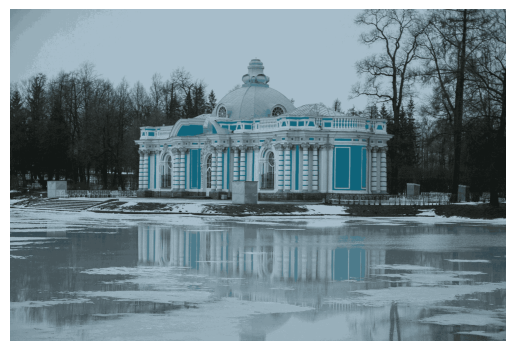

In [67]:
plt.axis('off')
plt.imshow(new_img)


Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

In [38]:
# < ENTER YOUR CODE HERE > 